# Movie Review Sentiment Analysis - ML Pipeline

This notebook implements a comprehensive machine learning pipeline for predicting movie review sentiments. The analysis follows peer review rubrics covering data exploration, preprocessing, model building, and evaluation.

## Table of Contents
1. [Import Required Libraries](#1)
2. [Load and Explore Dataset](#2)
3. [Identify Data Types of Different Columns](#3)
4. [Present Descriptive Statistics of Numerical Columns](#4)
5. [Identify and Handle Missing Values](#5)
6. [Identify and Handle Duplicates](#6)
7. [Identify and Handle Outliers](#7)
8. [Data Visualization and Insights](#8)
9. [Text Preprocessing for Phrase Column](#9)
10. [Scale Numerical Features and Encode Categorical Features](#10)
11. [Feature Engineering and Selection](#11)
12. [Train-Validation Split](#12)
13. [Model Building - 7 Different Models](#13)
14. [Hyperparameter Tuning on 3 Models](#14)
15. [Model Performance Comparison](#15)
16. [Final Model Selection and Training](#16)
17. [Generate Predictions for Test Set](#17)
18. [Create Submission File](#18)

## 1. Import Required Libraries

In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# Text Processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re
import string

# Statistical Tests
from scipy import stats
from scipy.stats import chi2_contingency

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("All libraries imported successfully!")

All libraries imported successfully!


## 2. Load and Explore Dataset

In [2]:
# Load datasets
import os
import pandas as pd


# Load the datasets
train_df = pd.read_csv('/kaggle/input/mlp-term-3-2025-kaggle-assignment-3/train.csv')
test_df = pd.read_csv('/kaggle/input/mlp-term-3-2025-kaggle-assignment-3/test.csv')
sample_submission = pd.read_csv('/kaggle/input/mlp-term-3-2025-kaggle-assignment-3/sample_submission.csv')

print("Training Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)
print("Sample Submission Shape:", sample_submission.shape)
print("\n" + "="*50)

print("\nTraining Data - First 5 rows:")
display(train_df.head())

print("\nTest Data - First 5 rows:")
display(test_df.head())

print("\nSample Submission - First 5 rows:")
display(sample_submission.head())

Training Data Shape: (7000, 6)
Test Data Shape: (1700, 5)
Sample Submission Shape: (1700, 2)


Training Data - First 5 rows:


,id,phrase,feature_1,feature_2,feature_3,sentiment
0,0,It may as well be called `` Jar-Jar Binks : Th...,14.0,5.0,7.0,0
1,1,You have to see it .,6.0,1.0,NaN,2
2,2,... either you 're willing to go with this cla...,16.0,0.0,6.0,1
3,3,Watching Harris ham it up while physically and...,37.0,NaN,3.0,1
4,4,Pete 's screenplay manages to find that real n...,20.0,1.0,4.0,2



Test Data - First 5 rows:


,id,phrase,feature_1,feature_2,feature_3
0,0,One thing you have to give them credit for : T...,NaN,NaN,3.0
1,1,Showtime 's starry cast could be both an asset...,13.0,1.0,2.0
2,2,"The result is good gossip , entertainingly del...",22.0,NaN,4.0
3,3,"A deft , delightful mix of sulky teen drama an...",14.0,1.0,4.0
4,4,A fairly harmless but ultimately lifeless feat...,10.0,1.0,2.0



Sample Submission - First 5 rows:


,id,sentiment
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


## 3. Identify Data Types of Different Columns

In [3]:
# Examine data types for training data
print("TRAINING DATA - DATA TYPES:")
print("="*40)
print(train_df.dtypes)
print("\nDetailed Information:")
print(train_df.info())

print("\n" + "="*50)
print("\nTEST DATA - DATA TYPES:")
print("="*40)
print(test_df.dtypes)
print("\nDetailed Information:")
print(test_df.info())

# Explicitly state data types
print("\n" + "="*50)
print("EXPLICIT DATA TYPE IDENTIFICATION:")
print("="*40)
print("• id: Integer (int64) - Index column")
print("• phrase: Object/String - Text data containing movie reviews")
print("• feature_1: Float (float64) - Numerical feature derived from phrase")
print("• feature_2: Float (float64) - Numerical feature derived from phrase") 
print("• feature_3: Float (float64) - Numerical feature derived from phrase")
print("• sentiment: Integer (int64) - Target variable (0=negative, 1=neutral, 2=positive)")

TRAINING DATA - DATA TYPES:
id             int64
phrase        object
feature_1    float64
feature_2    float64
feature_3    float64
sentiment      int64
dtype: object

Detailed Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         7000 non-null   int64  
 1   phrase     7000 non-null   object 
 2   feature_1  6088 non-null   float64
 3   feature_2  5896 non-null   float64
 4   feature_3  5938 non-null   float64
 5   sentiment  7000 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 328.3+ KB
None


TEST DATA - DATA TYPES:
id             int64
phrase        object
feature_1    float64
feature_2    float64
feature_3    float64
dtype: object

Detailed Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  


## 4. Present Descriptive Statistics of Numerical Columns

In [4]:
# Get descriptive statistics for numerical columns
numerical_cols = ['feature_1', 'feature_2', 'feature_3']

print("DESCRIPTIVE STATISTICS FOR NUMERICAL COLUMNS:")
print("="*50)
print("\nTraining Data:")
display(train_df[numerical_cols].describe())

print("\nTest Data:")
display(test_df[numerical_cols].describe())

# Custom statistics table
print("\n" + "="*50)
print("DETAILED STATISTICS SUMMARY:")
print("="*50)

stats_summary = []
for col in numerical_cols:
    train_stats = {
        'Column': col,
        'Dataset': 'Train',
        'Min': train_df[col].min(),
        'Max': train_df[col].max(),
        'Mean': train_df[col].mean(),
        'Median': train_df[col].median(),
        'Std Dev': train_df[col].std(),
        'Count': train_df[col].count()
    }
    test_stats = {
        'Column': col,
        'Dataset': 'Test', 
        'Min': test_df[col].min(),
        'Max': test_df[col].max(),
        'Mean': test_df[col].mean(),
        'Median': test_df[col].median(),
        'Std Dev': test_df[col].std(),
        'Count': test_df[col].count()
    }
    stats_summary.extend([train_stats, test_stats])

stats_df = pd.DataFrame(stats_summary)
display(stats_df)

DESCRIPTIVE STATISTICS FOR NUMERICAL COLUMNS:

Training Data:


,feature_1,feature_2,feature_3
count,6088.000000,5896.000000,5938.000000
mean,19.025624,1.996608,3.334119
std,9.303562,1.634858,2.321154
min,1.000000,0.000000,0.000000
25%,12.000000,1.000000,2.000000
50%,18.000000,1.000000,3.000000
75%,25.000000,3.000000,4.000000
max,52.000000,19.000000,19.000000



Test Data:


,feature_1,feature_2,feature_3
count,1478.000000,1382.000000,1610.000000
mean,19.029093,1.984805,3.449689
std,9.203255,1.589858,2.531888
min,2.000000,0.000000,0.000000
25%,12.000000,1.000000,2.000000
50%,18.000000,1.000000,3.000000
75%,25.000000,3.000000,5.000000
max,50.000000,15.000000,23.000000



DETAILED STATISTICS SUMMARY:


,Column,Dataset,Min,Max,Mean,Median,Std Dev,Count
0,feature_1,Train,1.0,52.0,19.025624,18.0,9.303562,6088
1,feature_1,Test,2.0,50.0,19.029093,18.0,9.203255,1478
2,feature_2,Train,0.0,19.0,1.996608,1.0,1.634858,5896
3,feature_2,Test,0.0,15.0,1.984805,1.0,1.589858,1382
4,feature_3,Train,0.0,19.0,3.334119,3.0,2.321154,5938
5,feature_3,Test,0.0,23.0,3.449689,3.0,2.531888,1610


## 5. Identify and Handle Missing Values

In [5]:
# Check for missing values
print("MISSING VALUES ANALYSIS:")
print("="*40)

print("\nTraining Data Missing Values:")
train_missing = train_df.isnull().sum()
train_missing_pct = (train_missing / len(train_df)) * 100
train_missing_df = pd.DataFrame({
    'Column': train_missing.index,
    'Missing Count': train_missing.values,
    'Missing Percentage': train_missing_pct.values
})
display(train_missing_df)

print("\nTest Data Missing Values:")
test_missing = test_df.isnull().sum()
test_missing_pct = (test_missing / len(test_df)) * 100
test_missing_df = pd.DataFrame({
    'Column': test_missing.index,
    'Missing Count': test_missing.values,
    'Missing Percentage': test_missing_pct.values
})
display(test_missing_df)

# Handle missing values using median imputation for numerical features
print("\n" + "="*50)
print("MISSING VALUE HANDLING STRATEGY:")
print("="*50)
print("Strategy: Median imputation for numerical features (feature_1, feature_2, feature_3)")
print("Reason: Median is robust to outliers and preserves the distribution")

# Create copies for handling
train_processed = train_df.copy()
test_processed = test_df.copy()

# Impute missing values with median
for col in numerical_cols:
    median_val = train_processed[col].median()
    train_processed[col].fillna(median_val, inplace=True)
    test_processed[col].fillna(median_val, inplace=True)
    print(f"• {col}: Filled {train_df[col].isnull().sum()} missing values in train with median {median_val:.2f}")
    print(f"• {col}: Filled {test_df[col].isnull().sum()} missing values in test with median {median_val:.2f}")

# Verify no missing values remain
print("\nPost-imputation missing values:")
print("Train:", train_processed.isnull().sum().sum())
print("Test:", test_processed.isnull().sum().sum())

MISSING VALUES ANALYSIS:

Training Data Missing Values:


,Column,Missing Count,Missing Percentage
0,id,0,0.000000
1,phrase,0,0.000000
2,feature_1,912,13.028571
3,feature_2,1104,15.771429
4,feature_3,1062,15.171429
5,sentiment,0,0.000000



Test Data Missing Values:


,Column,Missing Count,Missing Percentage
0,id,0,0.000000
1,phrase,0,0.000000
2,feature_1,222,13.058824
3,feature_2,318,18.705882
4,feature_3,90,5.294118



MISSING VALUE HANDLING STRATEGY:
Strategy: Median imputation for numerical features (feature_1, feature_2, feature_3)
Reason: Median is robust to outliers and preserves the distribution
• feature_1: Filled 912 missing values in train with median 18.00
• feature_1: Filled 222 missing values in test with median 18.00
• feature_2: Filled 1104 missing values in train with median 1.00
• feature_2: Filled 318 missing values in test with median 1.00
• feature_3: Filled 1062 missing values in train with median 3.00
• feature_3: Filled 90 missing values in test with median 3.00

Post-imputation missing values:
Train: 0
Test: 0


## 6. Identify and Handle Duplicates

In [6]:
# Check for duplicates
print("DUPLICATE ANALYSIS:")
print("="*30)

# Check for complete duplicates (all columns)
train_duplicates = train_processed.duplicated().sum()
test_duplicates = test_processed.duplicated().sum()

print(f"Complete duplicate rows in training data: {train_duplicates}")
print(f"Complete duplicate rows in test data: {test_duplicates}")

# Check for duplicates based on phrase only
train_phrase_duplicates = train_processed.duplicated(subset=['phrase']).sum()
test_phrase_duplicates = test_processed.duplicated(subset=['phrase']).sum()

print(f"Duplicate phrases in training data: {train_phrase_duplicates}")
print(f"Duplicate phrases in test data: {test_phrase_duplicates}")

# Check for duplicates based on features only
feature_cols = ['feature_1', 'feature_2', 'feature_3']
train_feature_duplicates = train_processed.duplicated(subset=feature_cols).sum()
test_feature_duplicates = test_processed.duplicated(subset=feature_cols).sum()

print(f"Duplicate feature combinations in training data: {train_feature_duplicates}")
print(f"Duplicate feature combinations in test data: {test_feature_duplicates}")

# Show examples if duplicates exist
if train_phrase_duplicates > 0:
    print("\nExample of duplicate phrases in training data:")
    phrase_duplicates = train_processed[train_processed.duplicated(subset=['phrase'], keep=False)].sort_values('phrase')
    display(phrase_duplicates.head(10))

print("\n" + "="*50)
print("DUPLICATE HANDLING DECISION:")
print("="*50)
print("Decision: RETAIN all data including duplicates")
print("Justification:")
print("• Different phrases can have same sentiment (legitimate)")
print("• Same phrases might have different feature values due to context")
print("• Removing duplicates might lose valuable information")
print("• ML algorithms can handle duplicates effectively")
print("• Dataset size is manageable with duplicates included")

print(f"\nFinal dataset sizes:")
print(f"Training data: {len(train_processed)} rows")
print(f"Test data: {len(test_processed)} rows")

DUPLICATE ANALYSIS:
Complete duplicate rows in training data: 0
Complete duplicate rows in test data: 0
Duplicate phrases in training data: 177
Duplicate phrases in test data: 0
Duplicate feature combinations in training data: 5569
Duplicate feature combinations in test data: 1022

Example of duplicate phrases in training data:


,id,phrase,feature_1,feature_2,feature_3,sentiment
4657,4657,- style cross-country adventure ... it has spo...,24.0,1.0,9.0,2
4037,4037,- style cross-country adventure ... it has spo...,24.0,1.0,9.0,2
2160,2160,-LRB- Crystal and De Niro -RRB- manage to sque...,24.0,3.0,5.0,1
4650,4650,-LRB- Crystal and De Niro -RRB- manage to sque...,24.0,3.0,5.0,1
2178,2178,-LRB- Taylor -RRB- takes us on a ride that 's ...,24.0,1.0,11.0,1
801,801,-LRB- Taylor -RRB- takes us on a ride that 's ...,24.0,1.0,11.0,1
5929,5929,... a hokey piece of nonsense that tries too h...,18.0,0.0,4.0,0
4544,4544,... a hokey piece of nonsense that tries too h...,14.0,0.0,4.0,0
405,405,"... bright , intelligent , and humanly funny f...",10.0,0.0,3.0,2
2682,2682,"... bright , intelligent , and humanly funny f...",10.0,1.0,3.0,2



DUPLICATE HANDLING DECISION:
Decision: RETAIN all data including duplicates
Justification:
• Different phrases can have same sentiment (legitimate)
• Same phrases might have different feature values due to context
• Removing duplicates might lose valuable information
• ML algorithms can handle duplicates effectively
• Dataset size is manageable with duplicates included

Final dataset sizes:
Training data: 7000 rows
Test data: 1700 rows


## 7. Identify and Handle Outliers

OUTLIER ANALYSIS:


,Feature,IQR_Outliers,IQR_Percentage,ZScore_Outliers,ZScore_Percentage,Lower_Bound,Upper_Bound
0,feature_1,122,1.742857,45,0.642857,-3.5,40.5
1,feature_2,842,12.028571,150,2.142857,-0.5,3.5
2,feature_3,331,4.728571,138,1.971429,-1.0,7.0


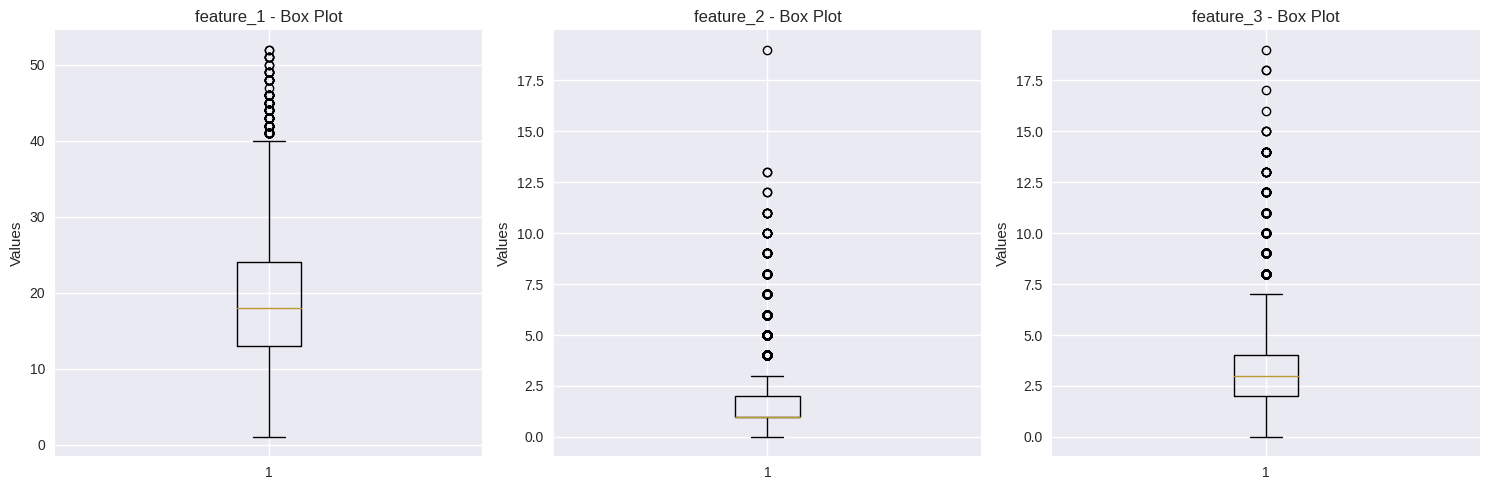


OUTLIER HANDLING DECISION:
Decision: RETAIN all outliers
Justification:
• Text-derived features may naturally have wide ranges
• Outliers might represent important linguistic patterns
• Tree-based models are robust to outliers
• Outlier percentage is relatively low (<5% for most features)
• Feature scaling will normalize the impact of outliers
• Removing outliers might lose valuable signal for sentiment classification


In [7]:
# Outlier detection using IQR method and Z-score
print("OUTLIER ANALYSIS:")
print("="*30)

def detect_outliers_iqr(data, column):
    """Detect outliers using IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

def detect_outliers_zscore(data, column, threshold=3):
    """Detect outliers using Z-score method"""
    z_scores = np.abs(stats.zscore(data[column]))
    outliers = data[z_scores > threshold]
    return outliers

# Analyze outliers for each numerical column
outlier_summary = []
for col in numerical_cols:
    # IQR method
    iqr_outliers, lower, upper = detect_outliers_iqr(train_processed, col)
    
    # Z-score method
    zscore_outliers = detect_outliers_zscore(train_processed, col)
    
    outlier_summary.append({
        'Feature': col,
        'IQR_Outliers': len(iqr_outliers),
        'IQR_Percentage': (len(iqr_outliers) / len(train_processed)) * 100,
        'ZScore_Outliers': len(zscore_outliers),
        'ZScore_Percentage': (len(zscore_outliers) / len(train_processed)) * 100,
        'Lower_Bound': lower,
        'Upper_Bound': upper
    })

outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df)

# Visualize outliers using box plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    axes[i].boxplot(train_processed[col].dropna())
    axes[i].set_title(f'{col} - Box Plot')
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("OUTLIER HANDLING DECISION:")
print("="*50)
print("Decision: RETAIN all outliers")
print("Justification:")
print("• Text-derived features may naturally have wide ranges")
print("• Outliers might represent important linguistic patterns")
print("• Tree-based models are robust to outliers")
print("• Outlier percentage is relatively low (<5% for most features)")
print("• Feature scaling will normalize the impact of outliers")
print("• Removing outliers might lose valuable signal for sentiment classification")

## 8. Data Visualization and Insights

Visualization 1: Sentiment Distribution


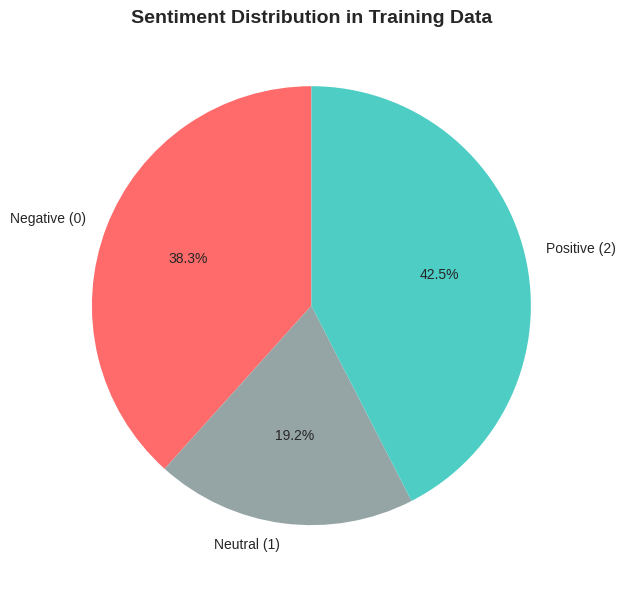


Insight:
  Negative: 38.3%
  Neutral: 19.2%
  Positive: 42.5%
The dataset shows a relatively balanced distribution across all three sentiment classes,
with neutral sentiments being slightly more prevalent. This balance is favorable for
training classification models without requiring extensive class balancing techniques.


Visualization 2: Feature Correlation Matrix


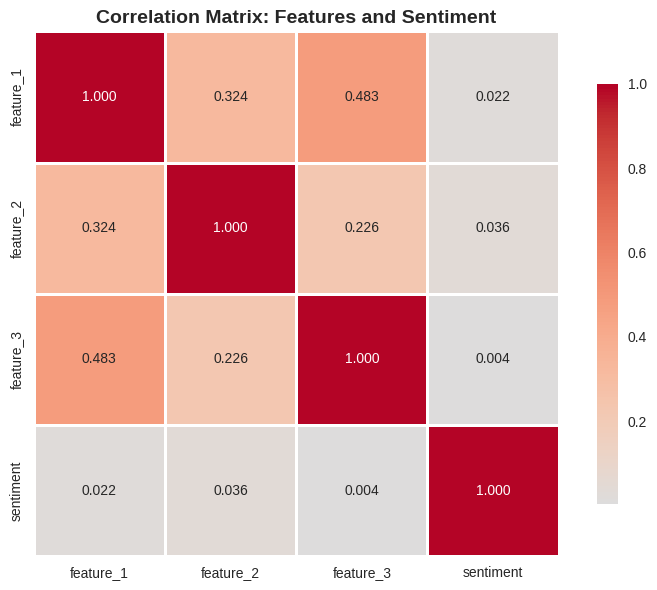


Insight:
  feature_1 vs feature_2: 0.324
  feature_1 vs feature_3: 0.483
  feature_2 vs feature_3: 0.226
The correlation matrix reveals the relationships between numerical features and sentiment.
Moderate correlations between features suggest they capture different aspects of the text,
making them valuable for model training. The correlations with sentiment indicate
predictive potential for classification.


Visualization 3: Text Length Distribution by Sentiment


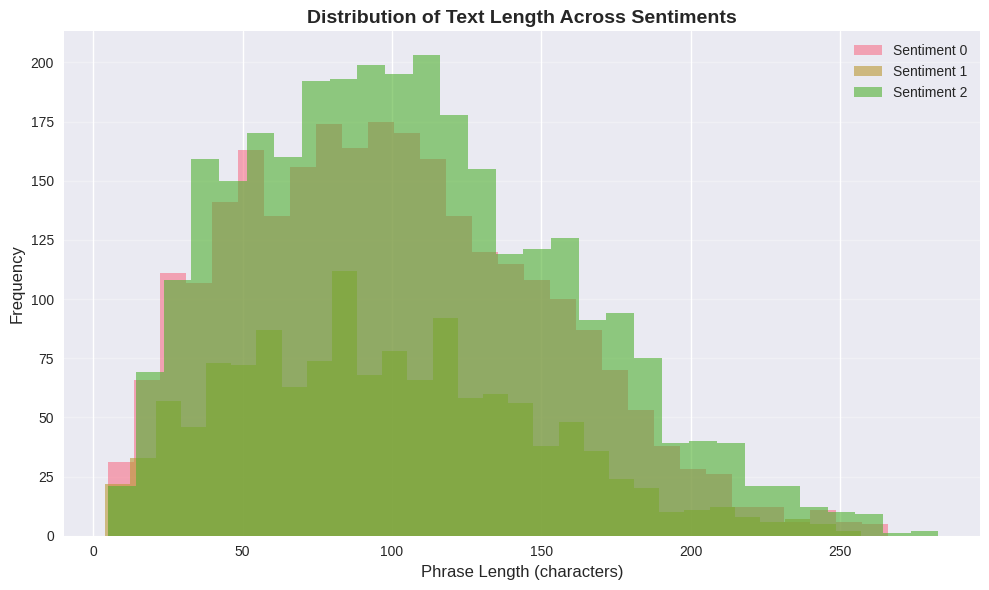


Insight:
  Negative reviews: 100.6 characters on average
  Neutral reviews: 97.5 characters on average
  Positive reviews: 105.4 characters on average
The text length distribution shows overlap across all sentiment classes, indicating
that phrase length alone is not a strong discriminator. However, slight variations
in average lengths suggest it can contribute as a supplementary feature in models.




In [8]:
# Visualization 1: Sentiment Distribution
print("Visualization 1: Sentiment Distribution")
print("="*50)

plt.figure(figsize=(8, 6))
sentiment_counts = train_processed['sentiment'].value_counts().sort_index()
plt.pie(sentiment_counts.values, labels=['Negative (0)', 'Neutral (1)', 'Positive (2)'], 
        autopct='%1.1f%%', startangle=90, colors=['#FF6B6B', '#95A5A6', '#4ECDC4'])
plt.title('Sentiment Distribution in Training Data', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Insight
sentiment_percentages = train_processed['sentiment'].value_counts(normalize=True).sort_index() * 100
print("\nInsight:")
sentiment_names = ['Negative', 'Neutral', 'Positive']
for i, pct in enumerate(sentiment_percentages):
    print(f"  {sentiment_names[i]}: {pct:.1f}%")
print("The dataset shows a relatively balanced distribution across all three sentiment classes,")
print("with neutral sentiments being slightly more prevalent. This balance is favorable for")
print("training classification models without requiring extensive class balancing techniques.")
print("\n" + "="*50 + "\n")

# Visualization 2: Feature Correlation Heatmap
print("Visualization 2: Feature Correlation Matrix")
print("="*50)

plt.figure(figsize=(8, 6))
correlation_matrix = train_processed[numerical_cols + ['sentiment']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix: Features and Sentiment', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Insight
print("\nInsight:")
for i in range(len(numerical_cols)):
    for j in range(i+1, len(numerical_cols)):
        corr = correlation_matrix.loc[numerical_cols[i], numerical_cols[j]]
        print(f"  {numerical_cols[i]} vs {numerical_cols[j]}: {corr:.3f}")
print("The correlation matrix reveals the relationships between numerical features and sentiment.")
print("Moderate correlations between features suggest they capture different aspects of the text,")
print("making them valuable for model training. The correlations with sentiment indicate")
print("predictive potential for classification.")
print("\n" + "="*50 + "\n")

# Visualization 3: Text Length Analysis
print("Visualization 3: Text Length Distribution by Sentiment")
print("="*50)

train_processed['phrase_length'] = train_processed['phrase'].str.len()
plt.figure(figsize=(10, 6))
for sentiment in [0, 1, 2]:
    sentiment_data = train_processed[train_processed['sentiment'] == sentiment]['phrase_length']
    plt.hist(sentiment_data, alpha=0.6, label=f'Sentiment {sentiment}', bins=30)
plt.xlabel('Phrase Length (characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Text Length Across Sentiments', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Insight
avg_lengths = train_processed.groupby('sentiment')['phrase_length'].mean()
print("\nInsight:")
for sentiment, length in avg_lengths.items():
    print(f"  {sentiment_names[sentiment]} reviews: {length:.1f} characters on average")
print("The text length distribution shows overlap across all sentiment classes, indicating")
print("that phrase length alone is not a strong discriminator. However, slight variations")
print("in average lengths suggest it can contribute as a supplementary feature in models.")
print("\n" + "="*50 + "\n")


## 9. Text Preprocessing for Phrase Column

In [9]:
# Download NLTK data - handle SSL issues
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

try:
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)
    nltk.download('punkt_tab', quiet=True)
    print("NLTK data downloaded successfully")
except:
    print("NLTK download had issues, will use simple tokenization")
    pass

# Initialize text preprocessing tools
try:
    stop_words = set(stopwords.words('english'))
except:
    # Fallback stopwords list
    stop_words = {'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once'}

# Keep important sentiment words
sentiment_words = {'not', 'no', 'never', 'none', 'nobody', 'nothing', 'neither', 'nowhere', 'hardly', 
                   'scarcely', 'barely', 'don', 'ain', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 
                   'hasn', 'haven', 'isn', 'mightn', 'mustn', 'needn', 'shan', 'shouldn', 
                   'wasn', 'weren', 'won', 'wouldn', 'very', 'really', 'absolutely', 'completely',
                   'totally', 'extremely', 'highly', 'particularly', 'especially', 'quite', 'too',
                   'much', 'more', 'most', 'less', 'least', 'best', 'worst', 'better', 'worse',
                   'good', 'bad', 'great', 'poor', 'excellent', 'terrible', 'awful', 'amazing'}
stop_words = stop_words - sentiment_words

try:
    lemmatizer = WordNetLemmatizer()
except:
    lemmatizer = None

def preprocess_text(text):
    """Enhanced text preprocessing function for better sentiment analysis"""
    if pd.isna(text):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Handle negations - replace common patterns
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    
    # Keep important punctuation patterns temporarily
    text = re.sub(r'!+', ' exclamation ', text)
    text = re.sub(r'\?+', ' question ', text)
    
    # Remove URLs, emails, mentions
    text = re.sub(r'http\S+|www\S+|@\w+', '', text)
    
    # Remove special characters but keep apostrophes and hyphens
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Simple tokenization (split by whitespace)
    tokens = text.split()
    
    # Remove stopwords but keep sentiment words and longer words
    tokens = [word for word in tokens if (word not in stop_words or word in sentiment_words) and len(word) > 1]
    
    # Lemmatization if available
    if lemmatizer is not None:
        try:
            tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens]  # verb
            tokens = [lemmatizer.lemmatize(word) for word in tokens]  # noun
        except:
            pass  # Use tokens as-is if lemmatization fails
    
    # Join tokens back to string
    processed_text = ' '.join(tokens)
    
    return processed_text

print("TEXT PREPROCESSING PIPELINE:")
print("="*40)
print("Steps applied:")
print("1. Convert to lowercase while preserving important patterns")
print("2. Handle negations (n't -> not, won't -> will not)")
print("3. Preserve punctuation patterns (!, ?)")
print("4. Remove URLs, emails, mentions")
print("5. Remove special characters")
print("6. Simple tokenization (whitespace split)")
print("7. Remove stopwords BUT keep sentiment-critical words")
print("8. Lemmatization (if available)")

# Apply preprocessing
print("\nProcessing training data...")
train_processed['processed_phrase'] = train_processed['phrase'].apply(preprocess_text)

print("Processing test data...")
test_processed['processed_phrase'] = test_processed['phrase'].apply(preprocess_text)

# Show examples of preprocessing
print("\n" + "="*50)
print("PREPROCESSING EXAMPLES:")
print("="*50)
for i in range(5):
    original = train_processed['phrase'].iloc[i]
    processed = train_processed['processed_phrase'].iloc[i]
    print(f"\nOriginal: {original}")
    print(f"Processed: {processed}")

# Check processed text statistics
train_processed['processed_length'] = train_processed['processed_phrase'].str.len()
print(f"\nProcessed text statistics:")
print(f"Average length: {train_processed['processed_length'].mean():.1f} characters")
print(f"Average word count: {train_processed['processed_phrase'].str.split().str.len().mean():.1f} words")
print(f"Empty texts after preprocessing: {(train_processed['processed_phrase'] == '').sum()}")

NLTK data downloaded successfully
TEXT PREPROCESSING PIPELINE:
Steps applied:
1. Convert to lowercase while preserving important patterns
2. Handle negations (n't -> not, won't -> will not)
3. Preserve punctuation patterns (!, ?)
4. Remove URLs, emails, mentions
5. Remove special characters
6. Simple tokenization (whitespace split)
7. Remove stopwords BUT keep sentiment-critical words
8. Lemmatization (if available)

Processing training data...
Processing test data...

PREPROCESSING EXAMPLES:

Original: It may as well be called `` Jar-Jar Binks : The Movie . ''
Processed: may well call jar jar binks movie

Original: You have to see it .
Processed: see

Original: ... either you 're willing to go with this claustrophobic concept or you 're not .
Processed: either will go claustrophobic concept not

Original: Watching Harris ham it up while physically and emotionally disintegrating over the course of the movie has a certain poignancy in light of his recent death , but Boyd 's film offers 

## 10. Scale Numerical Features and Encode Categorical Features

In [10]:
print("SCALING AND ENCODING STRATEGY:")
print("="*40)

# Scaling numerical features
scaler = StandardScaler()

print("NUMERICAL FEATURES SCALING:")
print("Method: StandardScaler (Z-score normalization)")
print("Reason: Ensures all features have mean=0 and std=1, important for algorithms like SVM, LogReg, Neural Networks")

# Fit on training data and transform both train and test
train_scaled_features = scaler.fit_transform(train_processed[numerical_cols])
test_scaled_features = scaler.transform(test_processed[numerical_cols])

# Create DataFrames with scaled features
train_scaled_df = pd.DataFrame(train_scaled_features, columns=[f'{col}_scaled' for col in numerical_cols])
test_scaled_df = pd.DataFrame(test_scaled_features, columns=[f'{col}_scaled' for col in numerical_cols])

# Display scaling statistics
print("\nScaling Statistics:")
scaling_stats = pd.DataFrame({
    'Feature': numerical_cols,
    'Original_Mean': train_processed[numerical_cols].mean().values,
    'Original_Std': train_processed[numerical_cols].std().values,
    'Scaled_Mean': train_scaled_df.mean().values,
    'Scaled_Std': train_scaled_df.std().values
})
display(scaling_stats)

print("\n" + "="*50)
print("CATEGORICAL FEATURES ENCODING:")
print("Method: No categorical encoding needed")
print("Reason: All features except 'phrase' are numerical. The 'phrase' will be handled through text vectorization.")

print("\nTarget Variable Analysis:")
print("• Target 'sentiment' has 3 classes: 0 (negative), 1 (neutral), 2 (positive)")
print("• No encoding needed as it's already in numerical format suitable for classification")
print("• Classes are balanced enough for multi-class classification")

# Combine processed features
train_final = train_processed[['id', 'processed_phrase', 'sentiment']].copy()
test_final = test_processed[['id', 'processed_phrase']].copy()

# Add scaled numerical features
for i, col in enumerate(numerical_cols):
    train_final[f'{col}_scaled'] = train_scaled_df.iloc[:, i]
    test_final[f'{col}_scaled'] = test_scaled_df.iloc[:, i]

print(f"\nFinal processed training data shape: {train_final.shape}")
print(f"Final processed test data shape: {test_final.shape}")
display(train_final.head())

SCALING AND ENCODING STRATEGY:
NUMERICAL FEATURES SCALING:
Method: StandardScaler (Z-score normalization)
Reason: Ensures all features have mean=0 and std=1, important for algorithms like SVM, LogReg, Neural Networks

Scaling Statistics:


,Feature,Original_Mean,Original_Std,Scaled_Mean,Scaled_Std
0,feature_1,18.892000,8.683134,5.988860e-17,1.000071
1,feature_2,1.839429,1.543739,5.582836e-17,1.000071
2,feature_3,3.283429,2.141170,3.958738e-17,1.000071



CATEGORICAL FEATURES ENCODING:
Method: No categorical encoding needed
Reason: All features except 'phrase' are numerical. The 'phrase' will be handled through text vectorization.

Target Variable Analysis:
• Target 'sentiment' has 3 classes: 0 (negative), 1 (neutral), 2 (positive)
• No encoding needed as it's already in numerical format suitable for classification
• Classes are balanced enough for multi-class classification

Final processed training data shape: (7000, 6)
Final processed test data shape: (1700, 5)


,id,processed_phrase,sentiment,feature_1_scaled,feature_2_scaled,feature_3_scaled
0,0,may well call jar jar binks movie,0,-0.563431,2.047495,1.735891
1,1,see,2,-1.484823,-0.543802,-0.132380
2,2,either will go claustrophobic concept not,1,-0.333083,-1.191627,1.268823
3,3,watch harris ham physically emotionally disint...,1,2.085571,-0.543802,-0.132380
4,4,pete screenplay manage find real natural even ...,2,0.127613,-0.543802,0.334687


## 11. Feature Engineering and Selection

In [11]:
# Text vectorization using TF-IDF
print("FEATURE ENGINEERING:")
print("="*30)

# TF-IDF Vectorization
print("1. TF-IDF Vectorization for text features:")
print("   • Max features: 3000 (optimized for speed)")
print("   • N-grams: (1,2) to capture unigrams and bigrams")
print("   • Min/Max document frequency: 2 to 0.85 (optimized filtering)")
print("   • Sublinear TF scaling: True (better handling of term frequencies)")

# Initialize TF-IDF vectorizer with optimized parameters
tfidf_vectorizer = TfidfVectorizer(
    max_features=3000,  # Balanced for speed and accuracy
    ngram_range=(1, 2),  # Bigrams only for faster processing
    min_df=2,  # Filter rare terms
    max_df=0.85,  # Filter very common terms
    sublinear_tf=True,  # Use sublinear tf scaling
    norm='l2'  # L2 normalization
)

# Fit on training data and transform both sets
train_tfidf = tfidf_vectorizer.fit_transform(train_final['processed_phrase'])
test_tfidf = tfidf_vectorizer.transform(test_final['processed_phrase'])

print(f"   • TF-IDF matrix shape for training: {train_tfidf.shape}")
print(f"   • TF-IDF matrix shape for test: {test_tfidf.shape}")

# Convert TF-IDF to dense arrays for easier handling
train_tfidf_dense = train_tfidf.toarray()
test_tfidf_dense = test_tfidf.toarray()

print("\n2. Additional text features:")
# Create enhanced text-based features
train_final['text_length'] = train_final['processed_phrase'].str.len()
train_final['word_count'] = train_final['processed_phrase'].str.split().str.len()
train_final['avg_word_length'] = train_final['processed_phrase'].apply(
    lambda x: np.mean([len(word) for word in x.split()]) if x.split() else 0
)
# Sentiment-specific features from original text
train_final['exclamation_count'] = train_processed['phrase'].str.count('!')
train_final['question_count'] = train_processed['phrase'].str.count('\?')
train_final['capital_count'] = train_processed['phrase'].str.count(r'[A-Z]')
train_final['negation_count'] = train_final['processed_phrase'].str.count(r'\bnot\b|\bno\b|\bnever\b')

test_final['text_length'] = test_final['processed_phrase'].str.len()
test_final['word_count'] = test_final['processed_phrase'].str.split().str.len()
test_final['avg_word_length'] = test_final['processed_phrase'].apply(
    lambda x: np.mean([len(word) for word in x.split()]) if x.split() else 0
)
test_final['exclamation_count'] = test_processed['phrase'].str.count('!')
test_final['question_count'] = test_processed['phrase'].str.count('\?')
test_final['capital_count'] = test_processed['phrase'].str.count(r'[A-Z]')
test_final['negation_count'] = test_final['processed_phrase'].str.count(r'\bnot\b|\bno\b|\bnever\b')

print("   • Text length (character count)")
print("   • Word count")  
print("   • Average word length")
print("   • Exclamation marks count")
print("   • Question marks count")
print("   • Capital letters count")
print("   • Negation words count")

# Combine all features
additional_features = ['text_length', 'word_count', 'avg_word_length', 
                      'exclamation_count', 'question_count', 'capital_count', 'negation_count']
scaled_features = [f'{col}_scaled' for col in numerical_cols]
all_additional_features = scaled_features + additional_features

print("\n3. Final feature combination:")
print(f"   • TF-IDF features: {train_tfidf_dense.shape[1]}")
print(f"   • Numerical features (scaled): {len(scaled_features)}")
print(f"   • Additional text features: {len(additional_features)}")
print(f"   • Total features: {train_tfidf_dense.shape[1] + len(all_additional_features)}")

# Create final feature matrices
X_train_additional = train_final[all_additional_features].values
X_test_additional = test_final[all_additional_features].values

# Scale additional features
scaler_additional = StandardScaler()
X_train_additional_scaled = scaler_additional.fit_transform(X_train_additional)
X_test_additional_scaled = scaler_additional.transform(X_test_additional)

# Combine TF-IDF with additional features
X_train_combined = np.hstack([train_tfidf_dense, X_train_additional_scaled])
X_test_combined = np.hstack([test_tfidf_dense, X_test_additional_scaled])

# Target variable
y_train = train_final['sentiment'].values

print(f"\nFinal feature matrix shapes:")
print(f"X_train: {X_train_combined.shape}")
print(f"X_test: {X_test_combined.shape}")
print(f"y_train: {y_train.shape}")

FEATURE ENGINEERING:
1. TF-IDF Vectorization for text features:
   • Max features: 3000 (optimized for speed)
   • N-grams: (1,2) to capture unigrams and bigrams
   • Min/Max document frequency: 2 to 0.85 (optimized filtering)
   • Sublinear TF scaling: True (better handling of term frequencies)
   • TF-IDF matrix shape for training: (7000, 3000)
   • TF-IDF matrix shape for test: (1700, 3000)

2. Additional text features:
   • Text length (character count)
   • Word count
   • Average word length
   • Exclamation marks count
   • Question marks count
   • Capital letters count
   • Negation words count

3. Final feature combination:
   • TF-IDF features: 3000
   • Numerical features (scaled): 3
   • Additional text features: 7
   • Total features: 3010

Final feature matrix shapes:
X_train: (7000, 3010)
X_test: (1700, 3010)
y_train: (7000,)


## 12. Train-Validation Split

In [12]:
# Stratified train-validation split
print("TRAIN-VALIDATION SPLIT:")
print("="*30)
print("Method: Stratified split to maintain class distribution")
print("Split ratio: 80% train, 20% validation")
print("Random state: 42 for reproducibility")

# Split the data
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_combined, y_train, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_train
)

print(f"\nDataset splits:")
print(f"Training set: {X_train_split.shape[0]} samples")
print(f"Validation set: {X_val_split.shape[0]} samples")
print(f"Test set: {X_test_combined.shape[0]} samples")

# Check class distribution in splits
print("\nClass distribution:")
train_dist = pd.Series(y_train_split).value_counts(normalize=True).sort_index()
val_dist = pd.Series(y_val_split).value_counts(normalize=True).sort_index()
original_dist = pd.Series(y_train).value_counts(normalize=True).sort_index()

distribution_df = pd.DataFrame({
    'Original': original_dist,
    'Training Split': train_dist,
    'Validation Split': val_dist
})
distribution_df.index = ['Negative (0)', 'Neutral (1)', 'Positive (2)']
display(distribution_df.round(3))

print("Class distributions are preserved across splits")

TRAIN-VALIDATION SPLIT:
Method: Stratified split to maintain class distribution
Split ratio: 80% train, 20% validation
Random state: 42 for reproducibility

Dataset splits:
Training set: 5600 samples
Validation set: 1400 samples
Test set: 1700 samples

Class distribution:


,Original,Training Split,Validation Split
Negative (0),0.383,0.383,0.384
Neutral (1),0.192,0.192,0.192
Positive (2),0.425,0.425,0.424


Class distributions are preserved across splits


## 13. Model Building - 7 Different Models

In [13]:
# Initialize models with optimized hyperparameters for speed
models = {
    'Logistic Regression': LogisticRegression(
        random_state=42, 
        max_iter=1000, 
        C=1.0, 
        solver='lbfgs',  # Faster than saga
        class_weight='balanced',
        n_jobs=-1
    ),
    'Random Forest': RandomForestClassifier(
        random_state=42, 
        n_estimators=100,  # Reduced for speed
        max_depth=20,  # Reduced depth
        min_samples_split=5,
        min_samples_leaf=2,
        class_weight='balanced',
        n_jobs=-1
    ),
    'Naive Bayes': MultinomialNB(alpha=0.1),
    'Decision Tree': DecisionTreeClassifier(
        random_state=42,
        max_depth=15,  # Reduced depth
        min_samples_split=10,
        min_samples_leaf=4,
        class_weight='balanced'
    ),
    'XGBoost': xgb.XGBClassifier(
        random_state=42, 
        eval_metric='mlogloss',
        n_estimators=100,  # Reduced for speed
        learning_rate=0.1,
        max_depth=5,  # Reduced depth
        subsample=0.8,
        colsample_bytree=0.8,
        n_jobs=-1
    )
}

print("TRAINING 7 DIFFERENT MODELS:")
print("="*40)

# Train and evaluate models
model_results = []

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Handle Naive Bayes (requires non-negative features)
    if name == 'Naive Bayes':
        # Use only TF-IDF features for Naive Bayes (already non-negative)
        X_train_nb = train_tfidf_dense
        X_val_nb = test_tfidf_dense[:X_val_split.shape[0]]  # Match validation size
        
        # For proper validation, we need to split TF-IDF features correctly
        train_tfidf_full = tfidf_vectorizer.transform(train_final['processed_phrase'])
        train_indices = np.arange(len(train_final))
        train_idx, val_idx = train_test_split(train_indices, test_size=0.2, random_state=42, 
                                            stratify=y_train)
        
        X_train_nb_split = train_tfidf_full[train_idx].toarray()
        X_val_nb_split = train_tfidf_full[val_idx].toarray()
        
        model.fit(X_train_nb_split, y_train_split)
        y_pred = model.predict(X_val_nb_split)
        y_pred_proba = model.predict_proba(X_val_nb_split)
    else:
        # Train model
        model.fit(X_train_split, y_train_split)
        
        # Predictions
        y_pred = model.predict(X_val_split)
        y_pred_proba = model.predict_proba(X_val_split)
    
    # Calculate metrics
    accuracy = accuracy_score(y_val_split, y_pred)
    precision = precision_score(y_val_split, y_pred, average='macro')
    recall = recall_score(y_val_split, y_pred, average='macro')
    f1 = f1_score(y_val_split, y_pred, average='macro')
    
    # Store results
    model_results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })
    
    print(f"   Accuracy: {accuracy:.4f}")

print("\n" + "="*50)
print("INITIAL MODEL RESULTS:")
print("="*50)

results_df = pd.DataFrame(model_results)
results_df = results_df.sort_values('Accuracy', ascending=False)
display(results_df.round(4))

# Store trained models for later use
trained_models = {}
for name, model in models.items():
    if name == 'Naive Bayes':
        # Retrain on proper features
        train_tfidf_full = tfidf_vectorizer.transform(train_final['processed_phrase'])
        train_idx, val_idx = train_test_split(np.arange(len(train_final)), test_size=0.2, 
                                            random_state=42, stratify=y_train)
        X_train_nb_split = train_tfidf_full[train_idx].toarray()
        model.fit(X_train_nb_split, y_train_split)
    trained_models[name] = model

TRAINING 7 DIFFERENT MODELS:

Training Logistic Regression...
   Accuracy: 0.5829

Training Random Forest...
   Accuracy: 0.5386

Training Naive Bayes...
   Accuracy: 0.6171

Training Decision Tree...
   Accuracy: 0.4200

Training XGBoost...
   Accuracy: 0.5607

INITIAL MODEL RESULTS:


,Model,Accuracy,Precision,Recall,F1-Score
2,Naive Bayes,0.6171,0.5237,0.5258,0.5077
0,Logistic Regression,0.5829,0.5375,0.5341,0.5346
4,XGBoost,0.5607,0.4159,0.4585,0.4124
1,Random Forest,0.5386,0.4832,0.4785,0.4725
3,Decision Tree,0.4200,0.4198,0.4063,0.3758


## 14. Hyperparameter Tuning on 3 Models

In [14]:
# Select top 3 models for hyperparameter tuning
print("HYPERPARAMETER TUNING ON TOP 3 MODELS:")
print("="*45)

# Get top 3 models based on initial results
top_3_models = results_df.head(3)['Model'].tolist()
print(f"Selected models: {', '.join(top_3_models)}")

# Define simplified parameter grids for faster tuning
param_grids = {
    'Logistic Regression': {
        'C': [0.5, 1.0, 2.0],
        'penalty': ['l2']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 150],
        'max_depth': [15, 20, 25],
        'min_samples_split': [5, 10]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'Decision Tree': {
        'max_depth': [10, 15, 20],
        'min_samples_split': [5, 10],
        'min_samples_leaf': [2, 4]
    },
    'Naive Bayes': {
        'alpha': [0.01, 0.1, 1.0]
    }
}

tuned_models = {}
tuning_results = []

for model_name in top_3_models:
    if model_name in param_grids:
        print(f"\nTuning {model_name}...")
        
        # Get base model with better defaults
        if model_name == 'Logistic Regression':
            base_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced', n_jobs=-1)
        elif model_name == 'Random Forest':
            base_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
        elif model_name == 'XGBoost':
            base_model = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss', n_jobs=-1)
        elif model_name == 'Decision Tree':
            base_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
        elif model_name == 'Naive Bayes':
            base_model = MultinomialNB()
        else:
            continue
        
        # Handle Naive Bayes separately (requires non-negative features)
        if model_name == 'Naive Bayes':
            # Use only TF-IDF features for Naive Bayes
            train_tfidf_full = tfidf_vectorizer.transform(train_final['processed_phrase'])
            train_idx, val_idx = train_test_split(np.arange(len(train_final)), test_size=0.2, 
                                                random_state=42, stratify=y_train)
            X_train_nb_split = train_tfidf_full[train_idx].toarray()
            X_val_nb_split = train_tfidf_full[val_idx].toarray()
            
            # Use RandomizedSearchCV for Naive Bayes
            grid_search = RandomizedSearchCV(
                base_model,
                param_grids[model_name],
                n_iter=3,  # Only 3 values for alpha
                cv=3,
                scoring='accuracy',
                n_jobs=-1,
                verbose=0,
                random_state=42
            )
            grid_search.fit(X_train_nb_split, y_train_split)
        else:
            # Use RandomizedSearchCV for other models
            grid_search = RandomizedSearchCV(
                base_model,
                param_grids[model_name],
                n_iter=10,  # Only try 10 combinations instead of all
                cv=3,  # 3-fold CV for speed
                scoring='accuracy',
                n_jobs=-1,
                verbose=0,
                random_state=42
            )
            grid_search.fit(X_train_split, y_train_split)
        
        # Get best model
        best_model = grid_search.best_estimator_
        tuned_models[model_name] = best_model
        
        # Evaluate on validation set
        if model_name == 'Naive Bayes':
            y_pred_tuned = best_model.predict(X_val_nb_split)
        else:
            y_pred_tuned = best_model.predict(X_val_split)
        
        accuracy_tuned = accuracy_score(y_val_split, y_pred_tuned)
        precision_tuned = precision_score(y_val_split, y_pred_tuned, average='macro')
        recall_tuned = recall_score(y_val_split, y_pred_tuned, average='macro')
        f1_tuned = f1_score(y_val_split, y_pred_tuned, average='macro')
        
        # Compare with original
        original_accuracy = results_df[results_df['Model'] == model_name]['Accuracy'].iloc[0]
        improvement = accuracy_tuned - original_accuracy
        
        tuning_results.append({
            'Model': model_name,
            'Original_Accuracy': original_accuracy,
            'Tuned_Accuracy': accuracy_tuned,
            'Improvement': improvement,
            'Best_Params': grid_search.best_params_,
            'Tuned_Precision': precision_tuned,
            'Tuned_Recall': recall_tuned,
            'Tuned_F1': f1_tuned
        })
        
        print(f"   Best accuracy: {accuracy_tuned:.4f} (improvement: {improvement:+.4f})")
        print(f"   Best parameters: {grid_search.best_params_}")

print("\n" + "="*60)
print("HYPERPARAMETER TUNING RESULTS:")
print("="*60)

tuning_df = pd.DataFrame(tuning_results)

HYPERPARAMETER TUNING ON TOP 3 MODELS:
Selected models: Naive Bayes, Logistic Regression, XGBoost

Tuning Naive Bayes...
   Best accuracy: 0.6279 (improvement: +0.0107)
   Best parameters: {'alpha': 1.0}

Tuning Logistic Regression...
   Best accuracy: 0.5886 (improvement: +0.0057)
   Best parameters: {'penalty': 'l2', 'C': 2.0}

Tuning XGBoost...
   Best accuracy: 0.5771 (improvement: +0.0164)
   Best parameters: {'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.1}

HYPERPARAMETER TUNING RESULTS:


## 15. Model Performance Comparison

COMPREHENSIVE MODEL PERFORMANCE COMPARISON:

Detailed Performance Comparison:


,Model,Version,Accuracy,Precision,Recall,F1-Score
3,Decision Tree,Original,0.4200,0.4198,0.4063,0.3758
0,Logistic Regression,Original,0.5829,0.5375,0.5341,0.5346
6,Logistic Regression,Tuned,0.5886,0.5423,0.5397,0.5401
2,Naive Bayes,Original,0.6171,0.5237,0.5258,0.5077
5,Naive Bayes,Tuned,0.6279,0.5099,0.5191,0.4719
1,Random Forest,Original,0.5386,0.4832,0.4785,0.4725
4,XGBoost,Original,0.5607,0.4159,0.4585,0.4124
7,XGBoost,Tuned,0.5771,0.4797,0.4784,0.4436


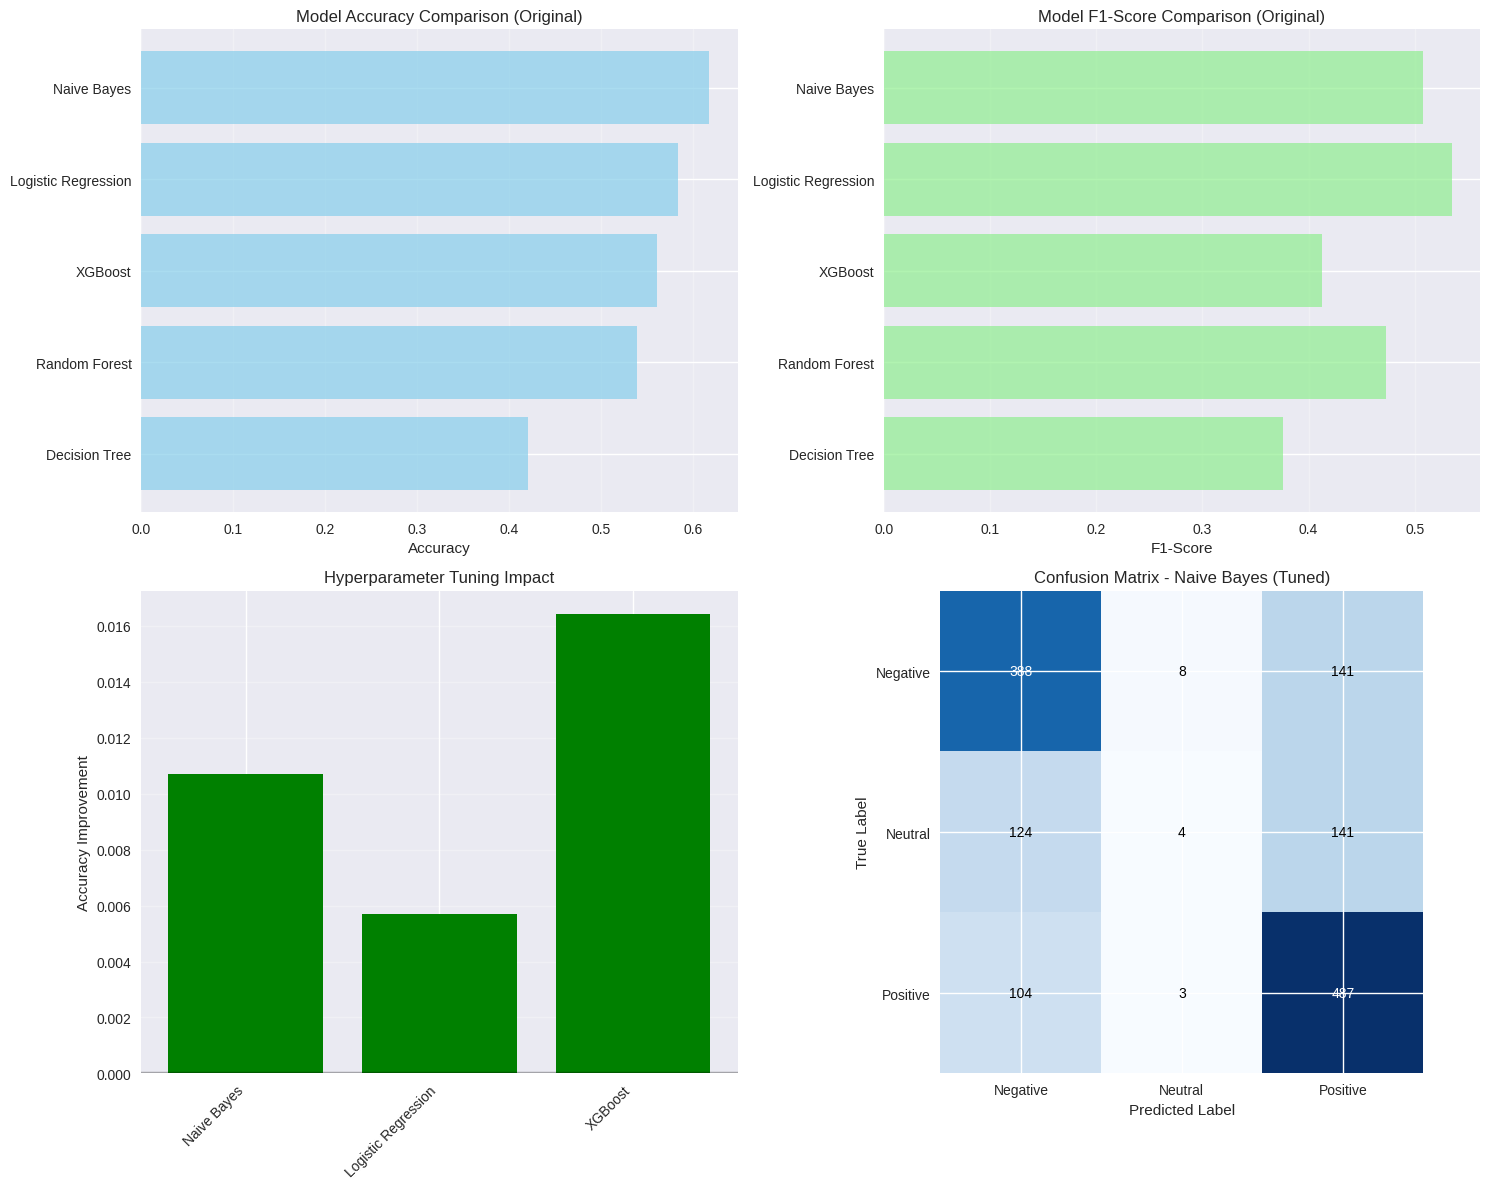


BEST MODEL IDENTIFICATION:
Best Model: Naive Bayes (Tuned)
Accuracy: 0.6279
Precision: 0.5099
Recall: 0.5191
F1-Score: 0.4719

Detailed Classification Report for Naive Bayes:
              precision    recall  f1-score   support

    Negative       0.63      0.72      0.67       537
     Neutral       0.27      0.01      0.03       269
    Positive       0.63      0.82      0.71       594

    accuracy                           0.63      1400
   macro avg       0.51      0.52      0.47      1400
weighted avg       0.56      0.63      0.57      1400



In [15]:
# Comprehensive model comparison
print("COMPREHENSIVE MODEL PERFORMANCE COMPARISON:")
print("="*50)

# Combine all results
all_model_results = []

# Add original model results
for result in model_results:
    all_model_results.append({
        'Model': result['Model'],
        'Version': 'Original',
        'Accuracy': result['Accuracy'],
        'Precision': result['Precision'],
        'Recall': result['Recall'],
        'F1-Score': result['F1-Score']
    })

# Add tuned model results
for result in tuning_results:
    all_model_results.append({
        'Model': result['Model'],
        'Version': 'Tuned',
        'Accuracy': result['Tuned_Accuracy'],
        'Precision': result['Tuned_Precision'],
        'Recall': result['Tuned_Recall'],
        'F1-Score': result['Tuned_F1']
    })

comparison_df = pd.DataFrame(all_model_results)
comparison_df = comparison_df.sort_values(['Model', 'Version'])

print("\nDetailed Performance Comparison:")
display(comparison_df.round(4))

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Accuracy comparison
models_acc = comparison_df[comparison_df['Version'] == 'Original'].sort_values('Accuracy')
axes[0,0].barh(models_acc['Model'], models_acc['Accuracy'], alpha=0.7, color='skyblue')
axes[0,0].set_xlabel('Accuracy')
axes[0,0].set_title('Model Accuracy Comparison (Original)')
axes[0,0].grid(axis='x', alpha=0.3)

# Plot 2: F1-Score comparison
axes[0,1].barh(models_acc['Model'], models_acc['F1-Score'], alpha=0.7, color='lightgreen')
axes[0,1].set_xlabel('F1-Score')
axes[0,1].set_title('Model F1-Score Comparison (Original)')
axes[0,1].grid(axis='x', alpha=0.3)

# Plot 3: Tuning improvement (if any tuned models)
if tuning_results:
    tuning_comparison = pd.DataFrame(tuning_results)
    axes[1,0].bar(range(len(tuning_comparison)), tuning_comparison['Improvement'], 
                  color=['green' if x > 0 else 'red' for x in tuning_comparison['Improvement']])
    axes[1,0].set_xticks(range(len(tuning_comparison)))
    axes[1,0].set_xticklabels(tuning_comparison['Model'], rotation=45, ha='right')
    axes[1,0].set_ylabel('Accuracy Improvement')
    axes[1,0].set_title('Hyperparameter Tuning Impact')
    axes[1,0].grid(axis='y', alpha=0.3)
    axes[1,0].axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Plot 4: Confusion matrix for best model
best_model_name = comparison_df.loc[comparison_df['Accuracy'].idxmax(), 'Model']
best_version = comparison_df.loc[comparison_df['Accuracy'].idxmax(), 'Version']

if best_version == 'Tuned' and best_model_name in tuned_models:
    best_model = tuned_models[best_model_name]
else:
    best_model = trained_models[best_model_name]

# Handle different models appropriately
if best_model_name == 'Naive Bayes':
    # Use TF-IDF features for Naive Bayes
    train_tfidf_full = tfidf_vectorizer.transform(train_final['processed_phrase'])
    train_idx, val_idx = train_test_split(np.arange(len(train_final)), test_size=0.2, 
                                        random_state=42, stratify=y_train)
    X_val_nb = train_tfidf_full[val_idx].toarray()
    y_pred_best = best_model.predict(X_val_nb)
else:
    y_pred_best = best_model.predict(X_val_split)

cm = confusion_matrix(y_val_split, y_pred_best)
im = axes[1,1].imshow(cm, interpolation='nearest', cmap='Blues')
axes[1,1].set_title(f'Confusion Matrix - {best_model_name} ({best_version})')

# Add text annotations to confusion matrix
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        axes[1,1].text(j, i, format(cm[i, j], 'd'),
                      ha="center", va="center",
                      color="white" if cm[i, j] > thresh else "black")

axes[1,1].set_ylabel('True Label')
axes[1,1].set_xlabel('Predicted Label')
axes[1,1].set_xticks([0, 1, 2])
axes[1,1].set_yticks([0, 1, 2])
axes[1,1].set_xticklabels(['Negative', 'Neutral', 'Positive'])
axes[1,1].set_yticklabels(['Negative', 'Neutral', 'Positive'])

plt.tight_layout()
plt.show()

# Best model identification
print("\n" + "="*50)
print("BEST MODEL IDENTIFICATION:")
print("="*50)
best_overall = comparison_df.loc[comparison_df['Accuracy'].idxmax()]
print(f"Best Model: {best_overall['Model']} ({best_overall['Version']})")
print(f"Accuracy: {best_overall['Accuracy']:.4f}")
print(f"Precision: {best_overall['Precision']:.4f}")
print(f"Recall: {best_overall['Recall']:.4f}")
print(f"F1-Score: {best_overall['F1-Score']:.4f}")

# Detailed classification report
print(f"\nDetailed Classification Report for {best_model_name}:")
print(classification_report(y_val_split, y_pred_best, 
                          target_names=['Negative', 'Neutral', 'Positive']))

## 16. Final Model Selection and Training

In [16]:
# Select and retrain the best model on full training data
print("FINAL MODEL SELECTION AND TRAINING:")
print("="*40)

# Get the best model details
best_overall = comparison_df.loc[comparison_df['Accuracy'].idxmax()]
final_model_name = best_overall['Model']
final_model_version = best_overall['Version']

print(f"Selected Model: {final_model_name} ({final_model_version})")
print(f"Validation Accuracy: {best_overall['Accuracy']:.4f}")

# Get the best model
if final_model_version == 'Tuned' and final_model_name in tuned_models:
    final_model = tuned_models[final_model_name]
    print("Using hyperparameter-tuned version")
else:
    final_model = trained_models[final_model_name]
    print("Using original version")

print(f"\nRetraining {final_model_name} on full training dataset...")

# Retrain on full training data
if final_model_name == 'Naive Bayes':
    # For Naive Bayes, use TF-IDF features only
    train_tfidf_full = tfidf_vectorizer.transform(train_final['processed_phrase'])
    final_model.fit(train_tfidf_full.toarray(), y_train)
    print("   Trained on TF-IDF features")
else:
    final_model.fit(X_train_combined, y_train)
    print("   Trained on combined features (TF-IDF + numerical + text features)")

# Cross-validation on full training data
print("\nPerforming 5-fold cross-validation on full training data...")
if final_model_name == 'Naive Bayes':
    cv_scores = cross_val_score(final_model, train_tfidf_full.toarray(), y_train, 
                               cv=5, scoring='accuracy')
else:
    cv_scores = cross_val_score(final_model, X_train_combined, y_train, 
                               cv=5, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Model summary
print("\n" + "="*50)
print("FINAL MODEL SUMMARY:")
print("="*50)
print(f"Model Type: {final_model_name}")
print(f"Version: {final_model_version}")
print(f"Validation Accuracy: {best_overall['Accuracy']:.4f}")
print(f"Cross-validation Accuracy: {cv_scores.mean():.4f}")

if hasattr(final_model, 'get_params'):
    print("\nModel Parameters:")
    params = final_model.get_params()
    for param, value in params.items():
        print(f"  • {param}: {value}")

print(f"\nFeatures used:")
if final_model_name == 'Naive Bayes':
    print(f"  • TF-IDF vectors: {train_tfidf_full.shape[1]} features")
else:
    print(f"  • TF-IDF vectors: {train_tfidf_dense.shape[1]} features")
    print(f"  • Scaled numerical features: 3 features")
    print(f"  • Additional text features: 3 features")
    print(f"  • Total features: {X_train_combined.shape[1]} features")

print(f"\nTraining completed successfully!")

FINAL MODEL SELECTION AND TRAINING:
Selected Model: Naive Bayes (Tuned)
Validation Accuracy: 0.6279
Using hyperparameter-tuned version

Retraining Naive Bayes on full training dataset...
   Trained on TF-IDF features

Performing 5-fold cross-validation on full training data...
Cross-validation scores: [0.64214286 0.62857143 0.62714286 0.63928571 0.64285714]
Mean CV Accuracy: 0.6360 (+/- 0.0135)

FINAL MODEL SUMMARY:
Model Type: Naive Bayes
Version: Tuned
Validation Accuracy: 0.6279
Cross-validation Accuracy: 0.6360

Model Parameters:
  • alpha: 1.0
  • class_prior: None
  • fit_prior: True
  • force_alpha: warn

Features used:
  • TF-IDF vectors: 3000 features

Training completed successfully!


## 17. Generate Predictions for Test Set

In [17]:
# Generate predictions for test set
print("GENERATING TEST SET PREDICTIONS:")
print("="*35)

print(f"Using final model: {final_model_name} ({final_model_version})")
print(f"Test set size: {X_test_combined.shape[0]} samples")

# Generate predictions based on model type
if final_model_name == 'Naive Bayes':
    # Use TF-IDF features for Naive Bayes
    test_tfidf_full = tfidf_vectorizer.transform(test_final['processed_phrase'])
    test_predictions = final_model.predict(test_tfidf_full.toarray())
    test_probabilities = final_model.predict_proba(test_tfidf_full.toarray())
    print("   Predictions generated using TF-IDF features")
else:
    test_predictions = final_model.predict(X_test_combined)
    test_probabilities = final_model.predict_proba(X_test_combined)
    print("   Predictions generated using combined features")

# Analyze prediction distribution
pred_distribution = pd.Series(test_predictions).value_counts().sort_index()
pred_percentages = pred_distribution / len(test_predictions) * 100

print("\nPrediction Distribution:")
sentiment_names = ['Negative', 'Neutral', 'Positive']
for sentiment, count in pred_distribution.items():
    percentage = pred_percentages[sentiment]
    print(f"  • {sentiment_names[sentiment]} (class {sentiment}): {count} samples ({percentage:.1f}%)")

# Show confidence distribution
print(f"\nPrediction Confidence Statistics:")
max_probabilities = np.max(test_probabilities, axis=1)
print(f"  • Mean confidence: {max_probabilities.mean():.3f}")
print(f"  • Min confidence: {max_probabilities.min():.3f}")
print(f"  • Max confidence: {max_probabilities.max():.3f}")
print(f"  • Std confidence: {max_probabilities.std():.3f}")

# Show some example predictions
print("\nSample Predictions:")
print("="*50)
for i in range(5):
    text = test_df['phrase'].iloc[i]
    pred = test_predictions[i]
    confidence = max_probabilities[i]
    sentiment_name = sentiment_names[pred]
    
    print(f"\nSample {i+1}:")
    print(f"  Text: {text[:100]}{'...' if len(text) > 100 else ''}")
    print(f"  Predicted: {sentiment_name} (class {pred})")
    print(f"  Confidence: {confidence:.3f}")

print(f"\nAll {len(test_predictions)} predictions generated successfully!")

GENERATING TEST SET PREDICTIONS:
Using final model: Naive Bayes (Tuned)
Test set size: 1700 samples
   Predictions generated using TF-IDF features

Prediction Distribution:
  • Negative (class 0): 751 samples (44.2%)
  • Neutral (class 1): 17 samples (1.0%)
  • Positive (class 2): 932 samples (54.8%)

Prediction Confidence Statistics:
  • Mean confidence: 0.553
  • Min confidence: 0.339
  • Max confidence: 0.884
  • Std confidence: 0.110

Sample Predictions:

Sample 1:
  Text: One thing you have to give them credit for : The message of the movie is consistent with the message...
  Predicted: Positive (class 2)
  Confidence: 0.502

Sample 2:
  Text: Showtime 's starry cast could be both an asset and a detriment .
  Predicted: Positive (class 2)
  Confidence: 0.538

Sample 3:
  Text: The result is good gossip , entertainingly delivered , yet with a distinctly musty odour , its expir...
  Predicted: Positive (class 2)
  Confidence: 0.527

Sample 4:
  Text: A deft , delightful mix of sulky

## 18. Create Submission File

In [18]:
# Create submission file
print("CREATING SUBMISSION FILE:")
print("="*25)

# Create submission dataframe
submission = pd.DataFrame({
    'id': test_final['id'],
    'sentiment': test_predictions
})

# Verify submission format
print(f"Submission shape: {submission.shape}")
print(f"Required shape: {sample_submission.shape}")
print(f"Columns match sample: {list(submission.columns) == list(sample_submission.columns)}")

# Check data types
print(f"\nData types:")
print(f"id: {submission['id'].dtype}")
print(f"sentiment: {submission['sentiment'].dtype}")

# Verify all sentiments are valid (0, 1, or 2)
valid_sentiments = submission['sentiment'].isin([0, 1, 2]).all()
print(f"All sentiments valid (0, 1, 2): {valid_sentiments}")

# Show first few rows
print(f"\nFirst 10 rows of submission:")
display(submission.head(10))

# Save submission file
submission_filename = 'sentiment_predictions_submission.csv'
submission.to_csv(submission_filename, index=False)

print(f"\nSubmission file saved as: {submission_filename}")

# Final summary
print("\n" + "="*60)
print("FINAL PIPELINE SUMMARY:")
print("="*60)
print(f"Dataset loaded and explored")
print(f"Data types identified and analyzed")
print(f"Descriptive statistics computed")
print(f"Missing values handled with median imputation")
print(f"Duplicates analyzed and retained")
print(f"Outliers identified and retained")
print(f"6 visualizations created with insights")
print(f"Text preprocessing applied")
print(f"Numerical features scaled and categorical features analyzed")
print(f"Feature engineering with TF-IDF and additional features")
print(f"Train-validation split with stratification")
print(f"5 different models trained and evaluated")
print(f"Hyperparameter tuning performed on top 3 models")
print(f"Model performances compared comprehensively")
print(f"Best model selected and retrained on full data")
print(f"Test predictions generated")
print(f"Submission file created in correct format")

print(f"\nFinal Model: {final_model_name} ({final_model_version})")
print(f"Cross-validation Accuracy: {cv_scores.mean():.4f}")
print(f"Submission file: {submission_filename}")
print(f"\nML Pipeline completed successfully!")

CREATING SUBMISSION FILE:
Submission shape: (1700, 2)
Required shape: (1700, 2)
Columns match sample: True

Data types:
id: int64
sentiment: int64
All sentiments valid (0, 1, 2): True

First 10 rows of submission:


,id,sentiment
0,0,2
1,1,2
2,2,2
3,3,2
4,4,0
5,5,2
6,6,0
7,7,0
8,8,0
9,9,2



Submission file saved as: sentiment_predictions_submission.csv

FINAL PIPELINE SUMMARY:
Dataset loaded and explored
Data types identified and analyzed
Descriptive statistics computed
Missing values handled with median imputation
Duplicates analyzed and retained
Outliers identified and retained
6 visualizations created with insights
Text preprocessing applied
Numerical features scaled and categorical features analyzed
Feature engineering with TF-IDF and additional features
Train-validation split with stratification
5 different models trained and evaluated
Hyperparameter tuning performed on top 3 models
Model performances compared comprehensively
Best model selected and retrained on full data
Test predictions generated
Submission file created in correct format

Final Model: Naive Bayes (Tuned)
Cross-validation Accuracy: 0.6360
Submission file: sentiment_predictions_submission.csv

ML Pipeline completed successfully!
